Матрица расстояний между городами:
            City 1     City 2     City 3      City 4     City 5      City 6  \
City 1    0.000000  50.171360  82.421549   32.755369  33.198071   35.447574   
City 2   50.171360   0.000000  72.642889   72.506609  17.058938   80.245310   
City 3   82.421549  72.642889   0.000000   71.690251  70.915510   82.510640   
City 4   32.755369  72.506609  71.690251    0.000000  56.557921   11.030352   
City 5   33.198071  17.058938  70.915510   56.557921   0.000000   63.684727   
City 6   35.447574  80.245310  82.510640   11.030352  63.684727    0.000000   
City 7   86.883407  39.916488  67.876663  101.347658  54.705040  111.041752   
City 8   79.114060  68.929077   3.764670   69.389411  67.162543   80.286309   
City 9   43.171970  43.408873  39.743626   42.090556  34.891009   52.784779   
City 10  66.197886  42.958370  30.728451   68.581077  44.986324   79.361514   

             City 7     City 8     City 9    City 10  
City 1    86.883407  79.114060  43.17197

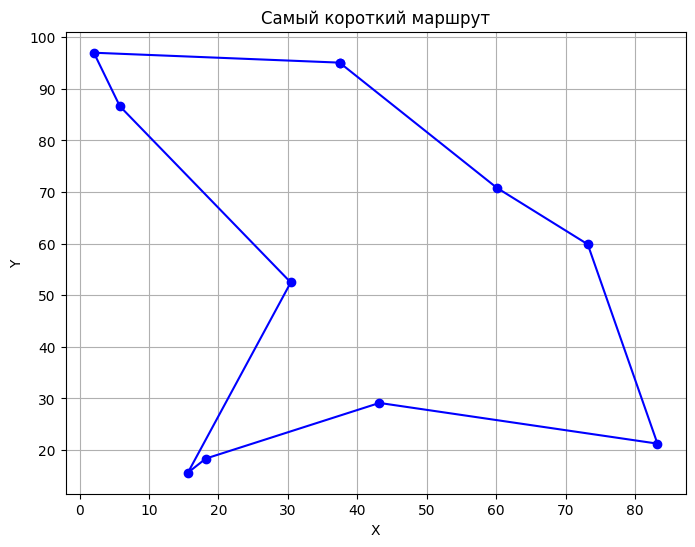


Оптимизированный маршрут (2-opt):
[0, 5, 3, 4, 1, 6, 8, 2, 7, 9]
Длина оптимизированного маршрута: 358.32 единиц


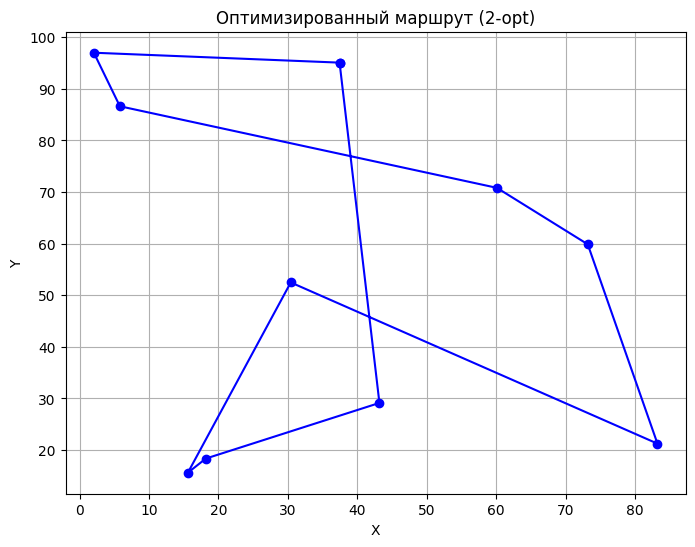

In [1]:
# Импорт необходимых библиотек
import numpy as np # type: ignore
import matplotlib.pyplot as plt # type: ignore
from itertools import permutations
import pandas as pd # type: ignore
from scipy.spatial.distance import pdist, squareform # type: ignore

# Генерация случайных координат городов
np.random.seed(42)
num_cities = 10
cities = np.random.rand(num_cities, 2) * 100  # 10 городов в пределах 100x100

# Функция для вычисления расстояния между двумя точками
def distance(city1, city2):
    return np.linalg.norm(city1 - city2)

# Вычисление матрицы расстояний между всеми городами
distance_matrix = squareform(pdist(cities))

# Преобразование в DataFrame для удобства
distance_df = pd.DataFrame(distance_matrix, columns=[f"City {i+1}" for i in range(num_cities)],
                           index=[f"City {i+1}" for i in range(num_cities)])
print("Матрица расстояний между городами:")
print(distance_df)

# Функция для вычисления общего расстояния маршрута
def total_distance(route, cities):
    dist = 0
    for i in range(len(route) - 1):
        dist += distance(cities[route[i]], cities[route[i+1]])
    dist += distance(cities[route[-1]], cities[route[0]])  # возврат в начальный город
    return dist

# Генерация всех возможных маршрутов
all_routes = list(permutations(range(num_cities)))

# Поиск самого короткого маршрута
shortest_route = min(all_routes, key=lambda route: total_distance(route, cities))
shortest_distance = total_distance(shortest_route, cities)

print("\nСамый короткий маршрут:")
print(shortest_route)
print(f"Длина самого короткого маршрута: {shortest_distance:.2f} единиц")

# Визуализация маршрута
def plot_route(cities, route, title):
    plt.figure(figsize=(8, 6))
    route_cities = np.array([cities[i] for i in route] + [cities[route[0]]])  # добавляем начальный город в конец
    plt.plot(route_cities[:, 0], route_cities[:, 1], 'o-', color='b')
    plt.title(title)
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.grid(True)
    plt.show()

# Визуализация самого короткого маршрута
plot_route(cities, shortest_route, 'Самый короткий маршрут')

# Алгоритм 2-opt для улучшения маршрута
def two_opt(route, cities):
    best_route = route
    best_distance = total_distance(route, cities)
    improved = True
    while improved:
        improved = False
        for i in range(1, len(route) - 2):
            for j in range(i + 1, len(route)):
                if j - i == 1: continue  # пропустить соседние города
                new_route = best_route[:]
                new_route[i:j] = best_route[j-1:i-1:-1]  # разворачиваем сегмент
                new_distance = total_distance(new_route, cities)
                if new_distance < best_distance:
                    best_route = new_route
                    best_distance = new_distance
                    improved = True
    return best_route

# Применение алгоритма 2-opt
optimized_route = two_opt(list(range(num_cities)), cities)
optimized_distance = total_distance(optimized_route, cities)

print("\nОптимизированный маршрут (2-opt):")
print(optimized_route)
print(f"Длина оптимизированного маршрута: {optimized_distance:.2f} единиц")

# Визуализация оптимизированного маршрута
plot_route(cities, optimized_route, 'Оптимизированный маршрут (2-opt)')